<a href="https://colab.research.google.com/github/VSKuz/VSKuz/blob/Some-AI-models/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BB%D0%B8%D1%86%D0%B0_%D0%B8_%D0%BE%D1%82%D1%80%D0%B8%D1%81%D0%BE%D0%B2%D0%BA%D0%B0_%D0%BE%D1%87%D0%BA%D0%BE%D0%B2_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Навигация по уроку**

1. [Задачи машинного зрения на OpenCV](https://colab.research.google.com/drive/1x1rxbNfV1ft1ztIPwxA3q34J4MULix5A)
2. [OpenCV. Распознавание лиц (практика)](https://colab.research.google.com/drive/1GwMZ8BAjtdKBDA5S0lAX1OPMFmIaYhqL)
3. Домашняя работа


Используя знания из практической части урока и функцию `blur_face` (размытие), проведите следующий эксперимент:
1. Найдите фото любого известного актера или актрисы.
2. Распознайте лицо на фотографии. Выделите лицо овалом. Какой метод для рисования овала использовать, вы должны найти самостоятельно.
3. Выделите на изображении глаза. Выделите их кружком. Если вы чувствуете в себе суперсилу и дополнительный бекграунд знаний, и хотите получить больше баллов за задание, то нарисуйте вместо кружков солнцезащитные очки (картинку очков можно найти в интернете, задача их правильно масштабировать и разместить).
4. Все лицо кроме глаз необходимо "заблюрить" (размыть) с помощью функции `blur_face` (функция объявлена ниже).




Оценка за задание:
* 1 балл - задача решена с помощью куратора, лицо распознано прямоугольником, глаза кругом.
* 2 балла - задача решена с незначительными подсказками куратора, лицо распознано прямоугольником или кругом, глаза кругом, лицо размыто.
* 3 балла - задача решена самостоятельно, лицо распознано овалом, глаза кругом, удалось заблюрить лицо, не затронув глаза.
* 4 балла - задача решена самостоятельно на 3 балла, удалось нарисовать очки с подсказкой куратора, недостаточна соблюдена симметрия расположения очков или недостаточно учтены их размеры.
* 5 баллов - задача полностью решена самостоятельно, все пункты выполнены.

In [ ]:
import cv2
import gdown
gdown.download('https://www.looper.com/img/gallery/the-most-paused-nicolas-cage-movie-moments/nicolas-cage-feels-the-sun-on-his-cheeks-in-con-air-1595447851.jpg', None, quiet=True)

# Загрузка изображения
img = cv2.imread('./nicolas-cage-feels-the-sun-on-his-cheeks-in-con-air-1595447851.jpg')

Для экспериментов и восстановления исходного изображения, вывожу эту переменную отдельно

In [ ]:
# Просто присвоить значение мы не можем, так как произойдет просто присваивание по ссылке
# т.е. обе переменые будут ссылаться на одну и ту же область памяти
# изменение одной переменной привет к изменению другой
img2 = img.copy() # копирование переменной

In [ ]:
from matplotlib import pyplot
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

# загрузка каскада Хаара
classifier = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")

# выполнение распознавания лиц
bboxes = classifier.detectMultiScale(img, scaleFactor=1.12) # пришлось выставлять доп. параметр, без него не распознавалось

array([[[ 27,  19,  19],
        [ 28,  20,  20],
        [ 29,  21,  21],
        ...,
        [ 20,  16,  21],
        [ 22,  18,  23],
        [ 25,  21,  26]],

       [[ 28,  20,  21],
        [ 27,  19,  20],
        [ 27,  19,  20],
        ...,
        [ 21,  17,  22],
        [ 22,  18,  23],
        [ 24,  20,  25]],

       [[ 28,  20,  21],
        [ 27,  19,  20],
        [ 28,  20,  21],
        ...,
        [ 21,  17,  22],
        [ 22,  18,  23],
        [ 24,  20,  25]],

       ...,

       [[ 12,  10,  10],
        [ 12,  10,  10],
        [ 12,  10,  10],
        ...,
        [177, 163, 151],
        [174, 160, 148],
        [172, 158, 146]],

       [[ 12,  10,  10],
        [ 12,  10,  10],
        [ 12,  10,  10],
        ...,
        [176, 162, 150],
        [171, 157, 145],
        [169, 155, 143]],

       [[ 12,  10,  10],
        [ 12,  10,  10],
        [ 12,  10,  10],
        ...,
        [176, 162, 150],
        [171, 157, 145],
        [168, 154, 142]]], dtype=uint8)
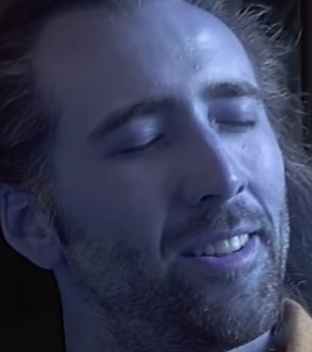

In [ ]:
for box in bboxes:
    # формирование координат
    x, y, width, height = box

    # найденная область с лицом
    face = img2[y - 20:y + height + 100, x - 80:x + width] # корректирую область для красоты
face

# Перейдём к распознанию глаз, лицо обведу овалом чуть позже, для красоты

In [ ]:
# загрузка каскада Хаара для поиска глаз
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")

# выполнение распознавания глаз
eyes = classifier_eye.detectMultiScale(face, minSize=(52, 52), maxSize=(89, 89)) #Без аргумента minSize отображалось много ложных результатов
eyes #Подглядел размеры результатов, чтобы настроить minSize

array([[206,  91,  55,  55],
       [ 96,  91,  79,  79]], dtype=int32)

#Эта часть для того, чтобы нарисаовать круги на области глаз и задать их координаты

In [ ]:
#Отобразим распознанную область
for (x_eye,y_eye,w_eye,h_eye) in eyes:

    # определяем центр круга
    center = (int(x_eye + 0.5*w_eye), int(y_eye + 0.5*h_eye))

    # вычисляем радиус окружности (подобран эмпирическим путем)
    radius = int(0.3 * (w_eye + h_eye))
    color = (0, 255, 0) # цвет в RGB (интенсивность цветов красный-зеленый-синий от 0 до 255)
    thickness = 2 # толщина линии

In [ ]:
print(eyes[0])
print(eyes[1])
print(box)
#face = img2[y - 20:y + height + 100, x - 80:x + width]
#face = img2[55, 332, 325, 637]
#e1 = img2[146, 538, 55, 55]
#e2 = img2[170, 428, 79, 79]


[206  91  55  55]
[96 91 79 79]
[405  75 232 232]


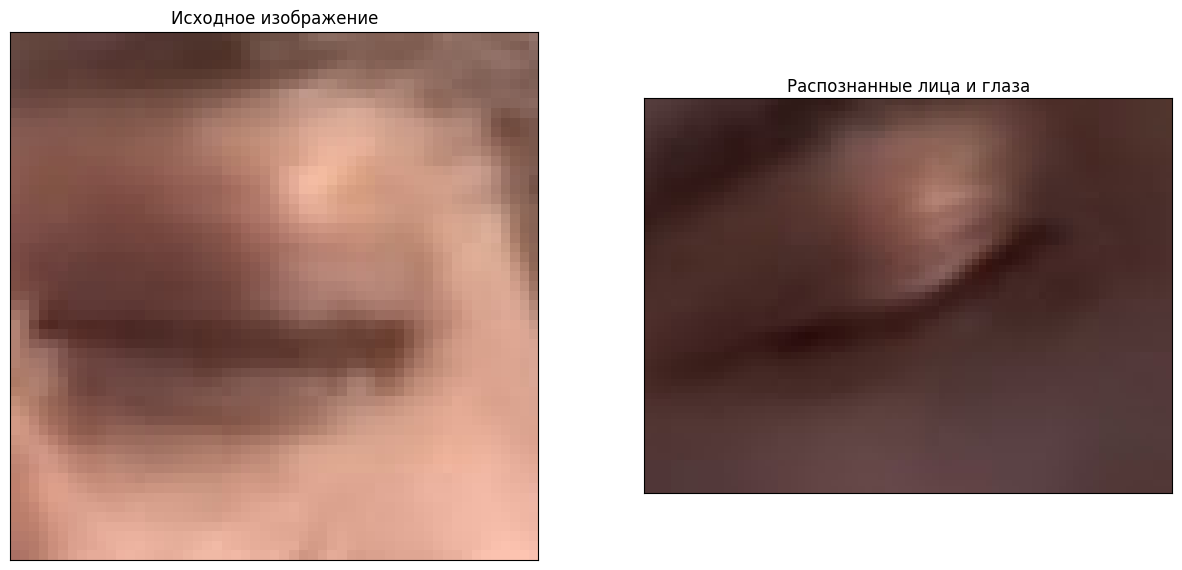

In [ ]:
#Замучился рассчитывать координаты глаз относительно img2, а не face
#Было бы здорово узнать как переконвертировать их автоматом, не используя 100500 строк кода для рассчёта
e1 = img2[146:201, 538:593].copy()
e2 = img2[170:229, 428:507].copy()

fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(e1, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(e2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица и глаза')

pyplot.show()

In [ ]:
# Если будет надо, нарисуем круги. Но пока я это не использую
cv2.circle(face, center, radius, color, thickness)

fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица и глаза')

pyplot.show()

# Блюрим фон и накладываем его на основное изображение

In [ ]:
face4blur = face.copy()

In [ ]:
def blur_face(img):
  (h, w) = img.shape[:2]
  dW = int(w / 3.0)
  dH = int(h / 3.0)
  if dW % 2 == 0:
      dW -= 1
  if dH % 2 == 0:
      dH -= 1
  return cv2.GaussianBlur(img, (dW, dH), 0)

b_face = blur_face(face4blur)

array([[[ 11,  15,  16],
        [ 11,  15,  16],
        [ 11,  15,  16],
        ...,
        [214, 198, 186],
        [213, 197, 185],
        [213, 197, 185]],

       [[ 11,  15,  16],
        [ 11,  15,  16],
        [ 11,  15,  16],
        ...,
        [215, 201, 189],
        [217, 200, 191],
        [214, 200, 188]],

       [[ 11,  15,  16],
        [ 11,  15,  16],
        [ 11,  15,  16],
        ...,
        [218, 206, 196],
        [219, 203, 196],
        [217, 205, 195]],

       ...,

       [[ 16,  12,  11],
        [ 16,  13,   9],
        [ 16,  12,  11],
        ...,
        [ 21,  16,  18],
        [ 22,  17,  19],
        [ 23,  18,  20]],

       [[ 16,  13,   9],
        [ 16,  13,   9],
        [ 16,  13,   9],
        ...,
        [ 21,  16,  18],
        [ 22,  17,  19],
        [ 23,  18,  20]],

       [[ 16,  13,   9],
        [ 16,  13,   9],
        [ 16,  13,   9],
        ...,
        [ 21,  16,  18],
        [ 22,  17,  19],
        [ 23,  18,  20]]], dtype=uint8)
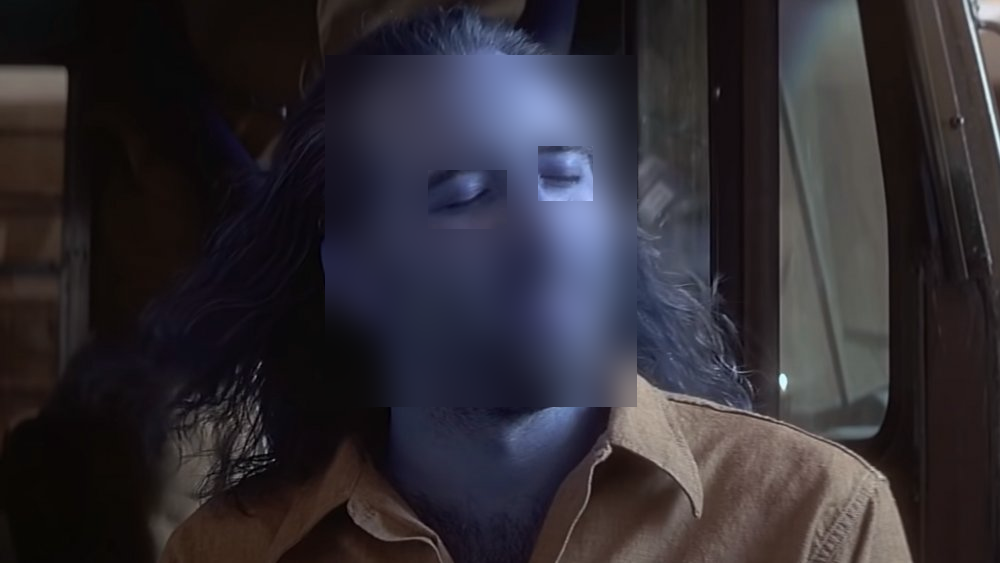

In [ ]:
#Накладываем блюр на основное изображение и убираем блюр с глаз
img2[y - 20:y + height + 100, x - 80:x + width] = b_face
img2[146:201, 538:593] = e1
img2[170:229, 428:507] = e2
img2

# Обвожу лицо овалом

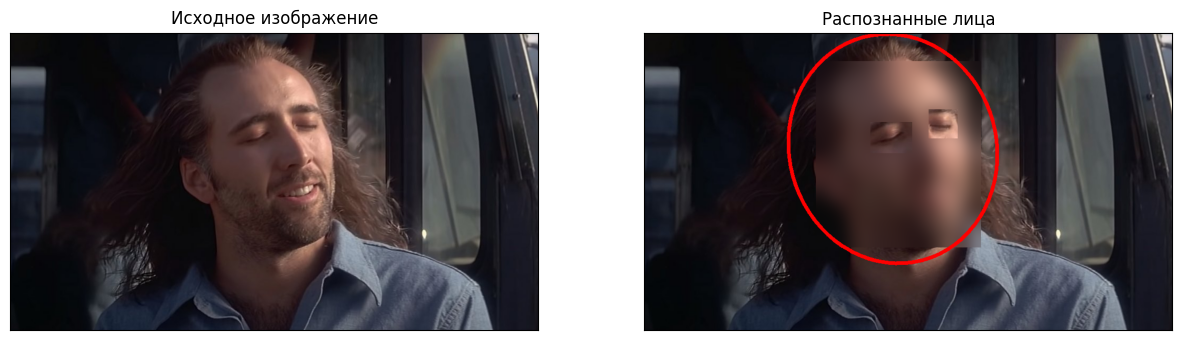

In [ ]:
# формирование овала вокруг каждого обнаруженного лица
cv2.ellipse (img2, (470, 220), (196, 218), -15, 0, 360, (0, 0, 255), 5) #Параметры подгонялись вручную, просто овал по центру распознанного выглядел довольно-таки коряво


fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица')

pyplot.show()

# Дадим стиля Никоаю 🕶

Я дико замучился с этими координатами, по-итогу, используя координаты выше и подправив их для лучшего результата, получил значения ниже

In [ ]:
print("Левый глаз ", eyes[1])
print("Правый глаз ", eyes[0])

Левый глаз  [96 91 79 79]
Правый глаз  [206  91  55  55]


In [ ]:
#Значения подкорректировал путём проб и ошибок
#Координаты для области face, а не img2
(mx, my, mw, mh) = [80,65,223,130]
mx -= int(0*mw) # для движения очков по х
my -= int(0*mh) # для движения очков по у
# область глаз
area = face[my:my+mh, mx:mx+mw]


array([[[ 60,  60,  82],
        [ 60,  60,  82],
        [ 60,  60,  82],
        ...,
        [ 34,  36,  47],
        [ 33,  35,  46],
        [ 33,  34,  45]],

       [[ 60,  60,  82],
        [ 60,  60,  82],
        [ 61,  60,  82],
        ...,
        [ 34,  36,  48],
        [ 34,  35,  46],
        [ 33,  35,  45]],

       [[ 60,  60,  82],
        [ 60,  60,  82],
        [ 61,  60,  82],
        ...,
        [ 35,  37,  48],
        [ 34,  36,  47],
        [ 33,  35,  46]],

       ...,

       [[ 48,  50,  76],
        [ 48,  50,  77],
        [ 48,  50,  77],
        ...,
        [ 75,  84, 115],
        [ 74,  83, 113],
        [ 73,  82, 112]],

       [[ 47,  50,  76],
        [ 48,  50,  77],
        [ 48,  50,  77],
        ...,
        [ 74,  84, 114],
        [ 73,  82, 113],
        [ 72,  81, 111]],

       [[ 47,  50,  76],
        [ 47,  50,  76],
        [ 48,  50,  77],
        ...,
        [ 74,  83, 114],
        [ 73,  82, 112],
        [ 72,  81, 111]]], dtype=uint8)
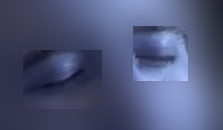

In [ ]:
area

Скачиваем очки и работаем с ними

In [ ]:
gdown.download('https://thypix.com/wp-content/uploads/2021/02/pixel-sunglasses-12.png', None, quiet=True)
sunglasses_mask = cv2.imread('./pixel-sunglasses-12.png')

In [ ]:
s_m2 = sunglasses_mask.copy()
h_mask, w_mask = s_m2.shape[:2]

#Добавляем очки

In [ ]:
# Маштабируем очки до размера глаз
s_m2 = cv2.resize(s_m2, (mw, mh), interpolation=cv2.INTER_AREA)
# Сделаем наши очки черно-белые и применим инвариантный бинарный порог
gray_mask = cv2.cvtColor(s_m2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(gray_mask, 120, 255, cv2.THRESH_BINARY_INV)

h_masked_eye, w_masked_eye = s_m2.shape[:2]
M = cv2.getRotationMatrix2D((w_masked_eye/2, h_masked_eye/2), 13, 1)

mask1 = mask
mask1 = cv2.warpAffine(mask1, M, (w_masked_eye, h_masked_eye)) #Вращаю отдельную маску, чтобы в masked_eye не возникло проблем

# Чтобы инвертировать маску в OpenCV, мы используем функцию cv2.bitwise_not(),
mask_inv = cv2.bitwise_not(mask1) #Повёрнутая инвертированная маска, если вращать именно mask_inv, то возникает непреодалимая для меня проблема с чёрной областью(((

# побитовое AND для двух изображений, результирующая - пиксели присутствующие на обоих изображениях
masked_eye = cv2.bitwise_and(s_m2, s_m2, mask=mask)
masked_eye = cv2.warpAffine(masked_eye, M, (w_masked_eye, h_masked_eye))

#  https://docs.opencv.org/2.4.13.2/modules/core/doc/operations_on_arrays.html?highlight=bitwise#bitwise-and
masked_face = cv2.bitwise_and(area, area, mask=mask_inv)

In [ ]:
# Объединяем глаза и очки
face[my:my+mh, mx:mx+mw] = cv2.add(masked_eye, masked_face)

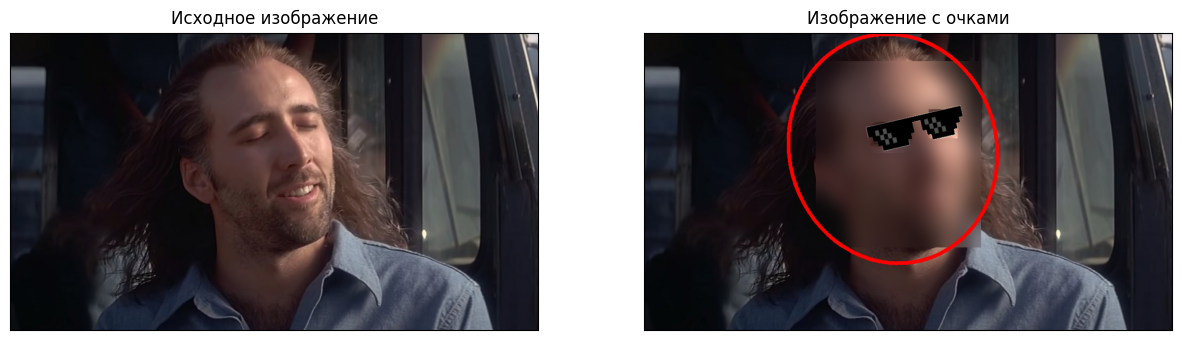

In [ ]:
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Изображение с очками')

pyplot.show()

Если нужно посмотреть великолепного Николаса в очках и оценить правильность их позиционирования, можно просто не накладывать блюр